In [89]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_diabetes 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso  #Lasso-регрессия
from sklearn.metrics import mean_squared_error

In [90]:
data = load_diabetes()
X = data.data
y = data.target
#Загружаем данные о болезни,обозначаем признаки и цел переменную

In [91]:
#80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [93]:
selected_features = np.abs(lasso.coef_) > 0

In [94]:
print("Выбранные признаки:")
for feature, is_selected in zip(data.feature_names, selected_features):
    if is_selected:
        print(feature)


Выбранные признаки:
sex
bmi
bp
s1
s3
s5
s6


In [95]:
X_train_selected = X_train[:, selected_features]  
X_test_selected = X_test[:, selected_features]   
lasso.fit(X_train_selected, y_train)

Lasso(alpha=0.1)

In [96]:
y_pred = lasso.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка модели на тестовой выборке: {mse:.2f}")

Среднеквадратичная ошибка модели на тестовой выборке: 2798.24


In [97]:
selected_coefficients = lasso.coef_ #теперь коэффициенты соответствуют выбранным признакам


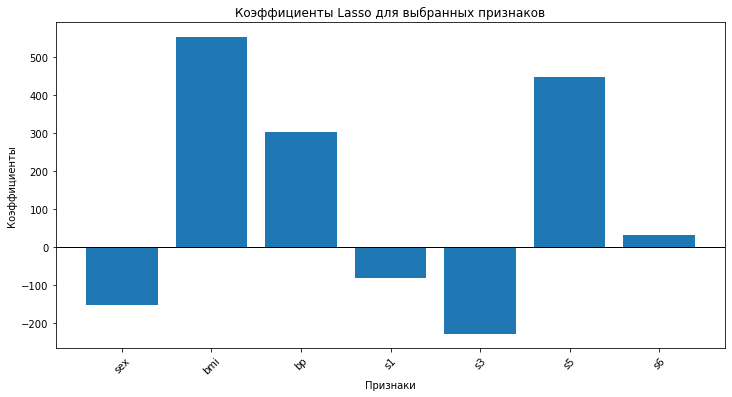

In [99]:
plt.figure(figsize=(12, 6))
plt.bar(np.array(data.feature_names)[selected_features], selected_coefficients)
plt.title("Коэффициенты Lasso для выбранных признаков")
plt.xlabel("Признаки")
plt.ylabel("Коэффициенты")
plt.xticks(rotation=45)#для лучшей читаемости

plt.axhline(0, color='black', lw=1) #линия по y для нуля
plt.show()